In [13]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


In [9]:
ed = [pd.read_csv('C:/Users/KIHyuk/Desktop/dacon_data/센서데이터/shikoku_electricity_%d.csv' %year,
                 skiprows=3,
                 names=['DATE','TIME','consumption'],
                 parse_dates={'date_hour':['DATE','TIME']},
                 index_col='date_hour') for year in [2012,2013,2014,2015,2016] 
     ]

In [10]:
elec_data = pd.concat(ed)

In [12]:
elec_data.head()

,consumption
date_hour,
2012-07-02 00:00:00,261
2012-07-02 01:00:00,256
2012-07-02 02:00:00,269
2012-07-02 03:00:00,289
2012-07-02 04:00:00,297


Text(0, 0.5, 'electricity consumption(*10000 kWh)')

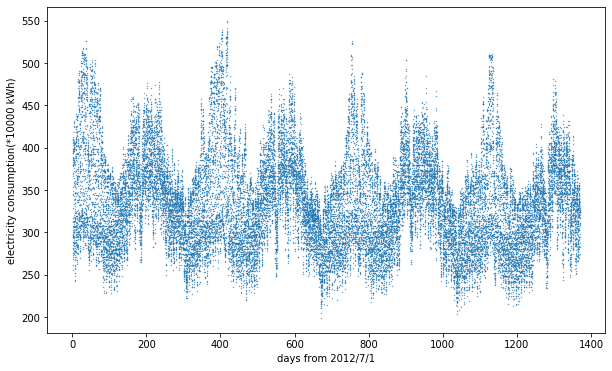

In [15]:
# 이미지 사이즈를 설정한다
plt.figure(figsize=(10, 6))

# 시계열 그래프 생성
delta = elec_data.index - pd.to_datetime('2012/07/01 00:00:00')
elec_data['time'] = delta.days + delta.seconds / 3600.0 / 24.0

plt.scatter(elec_data['time'], elec_data['consumption'], s=0.1)
plt.xlabel('days from 2012/7/1')
plt.ylabel('electricity consumption(*10000 kWh)')

# 그래프 저장
# plt.savefig('7-4-1-1-graph.png')

Text(0, 0.5, 'count')

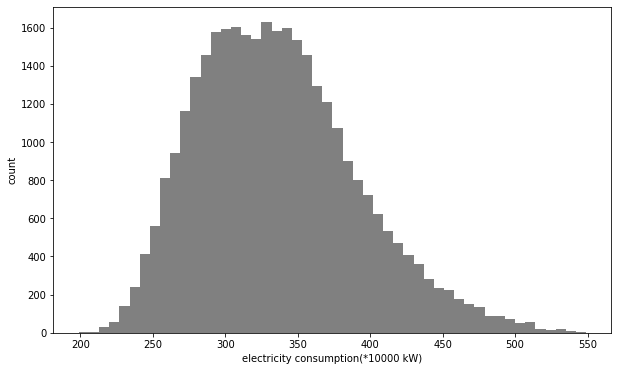

In [16]:
# 이미지 사이즈를 설정한다
plt.figure(figsize=(10, 6))

# 히스토그램 생성
plt.hist(elec_data['consumption'], bins=50, color="gray")
plt.xlabel('electricity consumption(*10000 kW)')
plt.ylabel(u'count')


Text(0, 0.5, 'Temperature(C degree)')

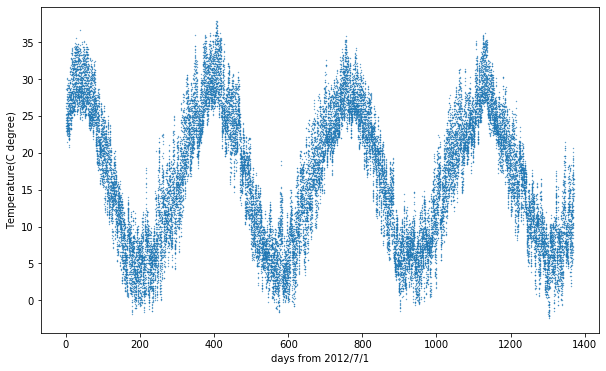

In [18]:
# 기상 데이터를 읽어 들이기
tmp = pd.read_csv(
    u'C:/Users/KIHyuk/Desktop/dacon_data/센서데이터/47891_city.csv',
    parse_dates={'date_hour': ["일시"]},
    index_col = "date_hour",
    na_values="×"
)

del tmp["시"]  # [시] 열은 사용하지 않으므로 삭제

# 열 이름에 한국어가 들어가 있으면 좋지 않으므로 지금부터 사용하는 열의 이름만 영어로 변경
columns = {
    "강수량(mm)": "rain",
    "기온(℃)": "temperature",
    "일조시간(h)": "sunhour",
    "습도(％)": "humid",
}
tmp.rename(columns=columns, inplace=True)

# 이미지 사이즈를 설정한다
plt.figure(figsize=(10, 6))

# 히스토그램 생성
delta = tmp.index - pd.to_datetime('2012/07/01 00:00:00')
tmp['time'] = delta.days + delta.seconds / 3600.0 / 24.0

plt.scatter(tmp['time'], tmp['temperature'], s=0.1)
plt.xlabel('days from 2012/7/1')
plt.ylabel('Temperature(C degree)')


In [47]:
tmp.head(3) 

,기압(hPa)현지,기압(hPa)해수면,rain,temperature,humid,풍향・풍속(m/s)풍속,풍향・풍속(m/s)풍향,sunhour,time
date_hour,,,,,,,,,
2013-11-28 01:00:00,1012.1,1013.8,--,11.9,48.0,7.0,西,NaN,515.041667
2013-11-28 02:00:00,1012.2,1013.9,--,11.5,50.0,7.4,西,NaN,515.083333
2013-11-28 03:00:00,1012.3,1014.0,--,10.9,47.0,6.8,西,NaN,515.125000


Text(0, 0.5, 'count')

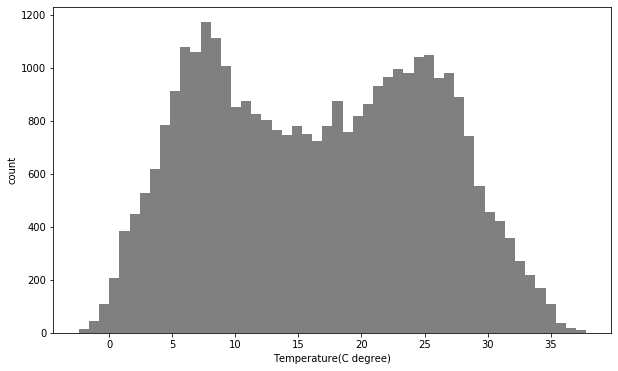

In [24]:
plt.figure(figsize=(10, 6))

# 히스토그램 생성

plt.hist(tmp['temperature'], bins=50, color="gray")
plt.xlabel('Temperature(C degree)')
plt.ylabel('count')

In [ ]:
############ data 결합 ################

In [28]:
takamatsu = elec_data.join(tmp['temperature']).dropna().as_matrix()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [53]:
elec_data.join(tmp['temperature']).dropna().head()

,consumption,time,temperature
date_hour,,,
2012-07-02 01:00:00,256,1.041667,24.5
2012-07-02 02:00:00,269,1.083333,24.1
2012-07-02 03:00:00,289,1.125000,23.6
2012-07-02 04:00:00,297,1.166667,23.3
2012-07-02 05:00:00,289,1.208333,23.0


In [30]:
takamatsu_elec = takamatsu[:,0:1] # y
takamatsu_wthr = takamatsu[:,1:] # x

In [63]:
kf = KFold(5)
a = [1,2,3,4,5]
s,b,c,d,e = kf.split(a)

In [64]:
s

(array([1, 2, 3, 4]), array([0]))

In [56]:
# 학습과 성능의 평가

from sklearn.model_selection import KFold
import sklearn.svm

data_count = len(takamatsu_elec)

# 교차검정의 준비
kf = KFold(n_folds=5)

# 교차검정 실시(모든 패턴을 실시)
for train, test in kf:
    x_train = takamatsu_wthr[train]
    x_test = takamatsu_wthr[test]
    y_train = takamatsu_elec[train]
    y_test = takamatsu_elec[test]

    # -- SVR --
    model = sklearn.svm.SVR()
    y_train = y_train.flatten()
    y_test = y_test.flatten()

    model.fit(x_train, y_train)
    print ("SVR: Training Score = %f, Testing(Validate) Score = %f" %
           (model.score(x_train, y_train), model.score(x_test, y_test)))

TypeError: __init__() got an unexpected keyword argument 'n_folds'